In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np
import json
import dump
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')


In [2]:
X_train = np.load('../dataset/X_train.npy')
y_train = np.load('../dataset/y_train.npy')
print('X_train:{0}, y_train:{1}'.format(X_train.shape, y_train.shape))


X_train:(7738, 17), y_train:(7738,)


In [3]:
clf = RandomForestClassifier()
print('Cross Validation Score: {0}'.format(np.mean(cross_val_score(clf, X_train, y_train, cv=10))))

Cross Validation Score: 0.9457218929570684


In [4]:
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
X_test = np.load('../dataset/X_test.npy')
y_test = np.load('../dataset/y_test.npy')

              precision    recall  f1-score   support

        -1.0       0.92      0.96      0.94      1428
         1.0       0.97      0.93      0.95      1889

   micro avg       0.95      0.95      0.95      3317
   macro avg       0.94      0.95      0.94      3317
weighted avg       0.95      0.95      0.95      3317



Accuracy Score: 95.0 %


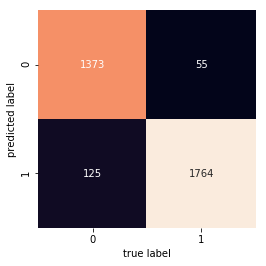

In [7]:
pred = clf.predict(X_test)
print(metrics.classification_report(pred, y_test))
print("\n\nAccuracy Score:", metrics.accuracy_score(y_test, pred).round(2)*100, "%")
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')

plt.ylabel('predicted label');




In [8]:
#print(forest_to_json(clf))
json.dump(dump.forest_to_json(clf), open('classifier.json', 'w'))